In [158]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect the Data

In [159]:
# Load the loan dataset
loan_data = pd.read_csv("loan.csv", low_memory=False)
data_dict = pd.read_excel("Data_Dictionary.xlsx", sheet_name=None)

In [160]:
# Display the first few rows of the loan dataset
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [161]:
#Read the shape of the dataset
loan_data.shape

(39717, 111)

In [162]:
#Concise summary of the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [163]:
# See the statistics summary of the dataset
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Data Cleaning and Preprocessing

In [164]:
# Check for missing values in the dataset
missing_values = loan_data.isnull().sum()

# Display missing values information
missing_values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [165]:
# Review the missing values and their percentages
missing_values_percentage = (loan_data.isnull().sum() / len(loan_data)) * 100

# Display missing values with their percentages
missing_values_percentage


id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [166]:
# Defining a threshold for dropping columns with high percentage of missing values (e.g., > 50%)
threshold = 0.5 * len(loan_data)

# Dropping columns with more than 50% missing values
loan_data_cleaned = loan_data.dropna(thresh=threshold, axis=1)

In [167]:
# Handling remaining missing values by filling with appropriate values (e.g., mode for categorical, mean/median for numerical)
for column in loan_data_cleaned.columns:
    if loan_data_cleaned[column].dtype == 'object':
        loan_data_cleaned[column].fillna(loan_data_cleaned[column].mode()[0], inplace=True)
    else:
        loan_data_cleaned[column].fillna(loan_data_cleaned[column].median(), inplace=True)

# Correcting data types (e.g., percentage columns as floats, date columns as datetime)
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.rstrip('%').astype('float') / 100
loan_data_cleaned['term'] = loan_data_cleaned['term'].str.extract('(\d+)').astype('int')

# The issue_d column has issues while converting to date format
#loan_data_cleaned['issue_d'] = pd.to_datetime(loan_data_cleaned['issue_d']) 

In [168]:
# Handling date conversion with errors
def safe_convert_to_datetime(df, column):
    """
    This function converts a specified column in a pandas DataFrame to datetime format.
    It uses the 'coerce' error handling method, which replaces any non-convertible values with NaT (Not a Time).

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column to be converted.
    column (str): The name of the column to be converted.

    Returns:
    pandas.DataFrame: The DataFrame with the specified column converted to datetime format.
    """
    df[column] = pd.to_datetime(df[column], errors='coerce')
    return df

# Applying the function to the issue_d column
loan_data_cleaned = safe_convert_to_datetime(loan_data_cleaned, 'issue_d')


In [169]:
# Verify the cleaning steps
loan_data_cleaned_info = loan_data_cleaned.info()
missing_values_after_cleaning = loan_data_cleaned.isnull().sum().sum()

# Handling the 'MMM-YY' format explicitly during the conversion
loan_data_cleaned['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y', errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  int32         
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   39717 non-null  object        
 11  emp_length                  39717 non-null  object    

In [170]:
loan_data_cleaned['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [171]:
# Identify rows that failed to convert
failed_conversion = loan_data_cleaned[loan_data_cleaned['issue_d'].isnull()]['issue_d']

failed_conversion


Series([], Name: issue_d, dtype: datetime64[ns])

In [172]:
# Verify the final cleaning steps
loan_data_cleaned_info = loan_data_cleaned.info()
missing_values_after_cleaning = loan_data_cleaned.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  int32         
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   39717 non-null  object        
 11  emp_length                  39717 non-null  object    

### Drop Unnecessary Columns
- Dropping **tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, application_type, policy_code, 
  collections_12_mths_ex_med, initial_list_status, pymnt_plan** Columns with only one values.
- **emp_title, and title** columns have text values which are more unique values.
- **id, url, and member_id** having all unique values which means any one of these can be used as primary 
  key. So id will be unique identifier and remove url and member id columns.
- **total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, 
  last_pymnt_d, out_prncp, out_prncp_inv** variables are valid for barrowers who already took loan. As we are 
  only interested only in loan application details these columns can be removed.
- **recoveries, collection_recovery_fee** columns are only valid for charged off loans. Will removed these 
  columns.
- **Loan Status** Column has 3 distict values out of them we need only *`Fully Paid and Charged Off`*. So, we 
  will remove the rows with *`Current`* values in loan status.

In [173]:
loan_data_cleaned.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths',\
           'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med',\
           'initial_list_status', 'pymnt_plan', 'emp_title', 'title', 'member_id', 'url',\
          'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d',\
           'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

<font size = "6">*******Exploratory Data Analysis (EDA)*******</font>

<font size="5">**Univariate Analysis**</font>

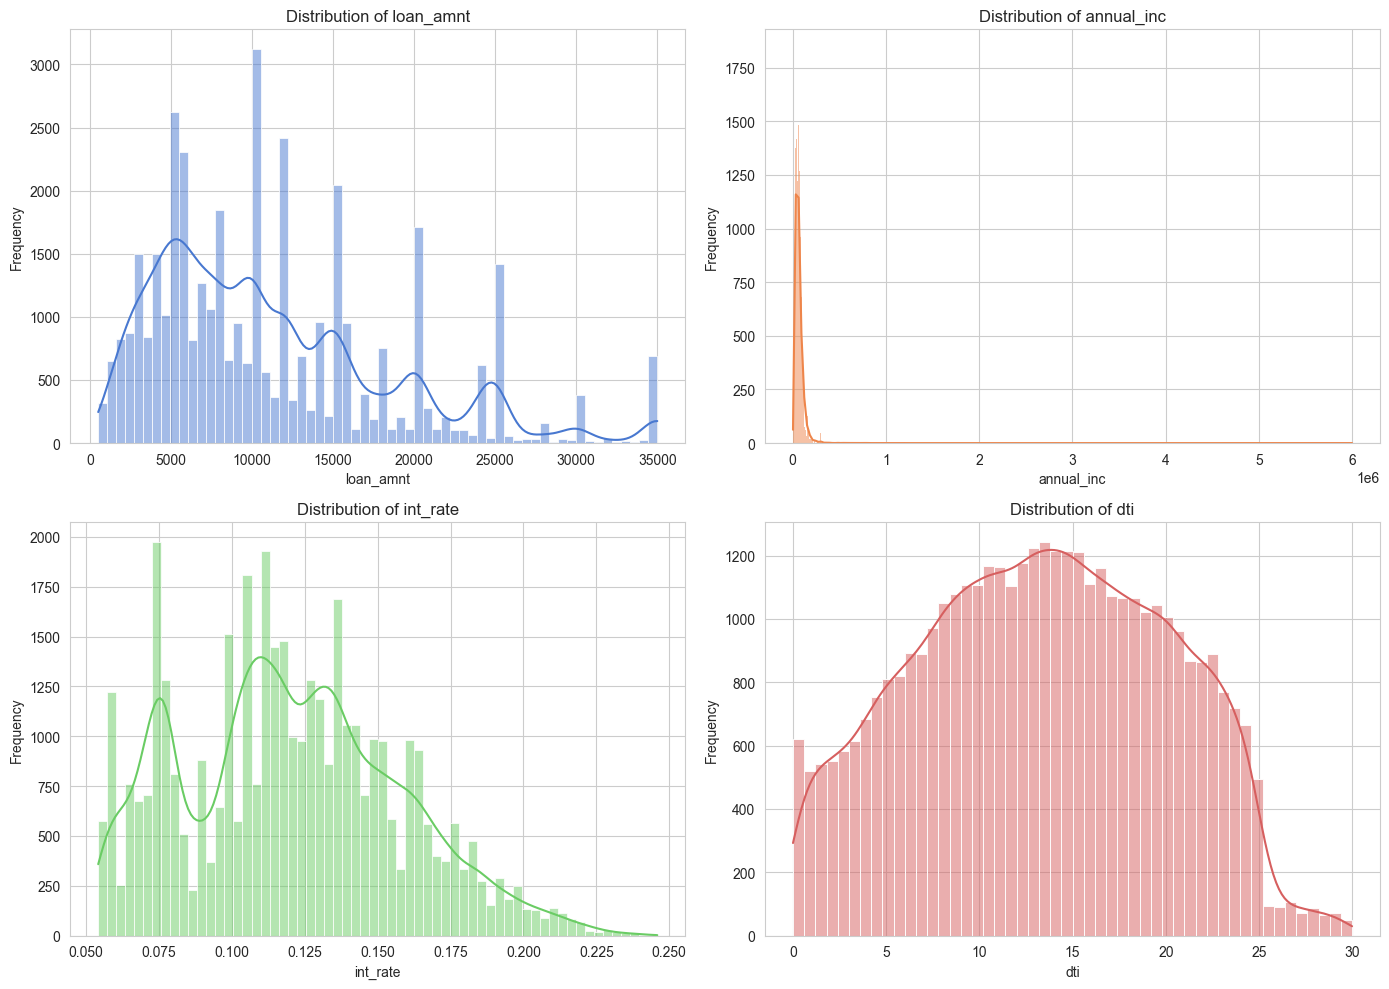

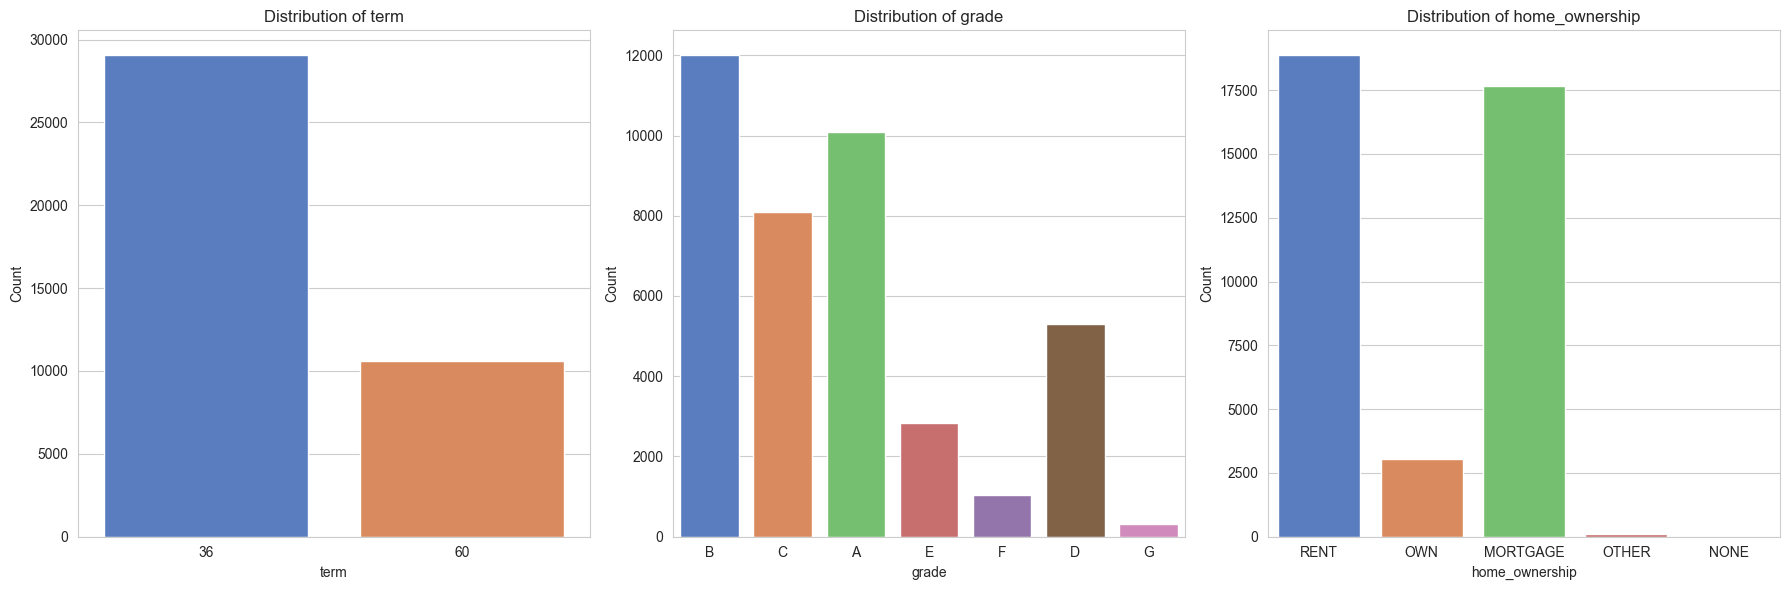

In [174]:
# Set Seaborn style and color palette
sns.set_style("whitegrid")
palette = sns.set_palette("muted")

# Define numerical and categorical features
numerical_features = ['loan_amnt', 'annual_inc', 'int_rate', 'dti']
categorical_features = ['term', 'grade', 'home_ownership']

# Plotting numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    sns.histplot(loan_data_cleaned[feature], kde=True, ax=axes[i//2, i%2], color=sns.color_palette("muted")[i])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=loan_data_cleaned, x=feature, ax=axes[i], palette="muted")
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [175]:
# Summary Statistics for Numerical Features
numerical_summary = loan_data_cleaned[numerical_features].describe()
numerical_summary

,loan_amnt,annual_inc,int_rate,dti
count,39717.000000,3.971700e+04,39717.000000,39717.000000
mean,11219.443815,6.896893e+04,0.120212,13.315130
std,7456.670694,6.379377e+04,0.037248,6.678594
min,500.000000,4.000000e+03,0.054200,0.000000
25%,5500.000000,4.040400e+04,0.092500,8.170000
50%,10000.000000,5.900000e+04,0.118600,13.400000
75%,15000.000000,8.230000e+04,0.145900,18.600000
max,35000.000000,6.000000e+06,0.245900,29.990000


<font size="4">***Univariate Analysis Summary***</font>


**Numerical Features**:

- **Loan Amount**: `Distribution shows most loans are in the lower range.`
- **Annual Income**: `Right-skewed, with most incomes in the lower range.`
- **Interest Rate**: `Most loans have interest rates around 10-15%.`
- **Debt-to-Income Ratio (DTI)**: `Shows the distribution of borrowers' DTI.` 


**Categorical Features**:

- **Term**: `Majority of loans have a term of 36 months.`
- **Grade**: `Distribution of loan grades showing creditworthiness.`
- **Home Ownership**: `Status of borrowers' home ownership.`

<font size = "5">**Bivariate Analysis**</font>

Numerical Features vs. Loan Status

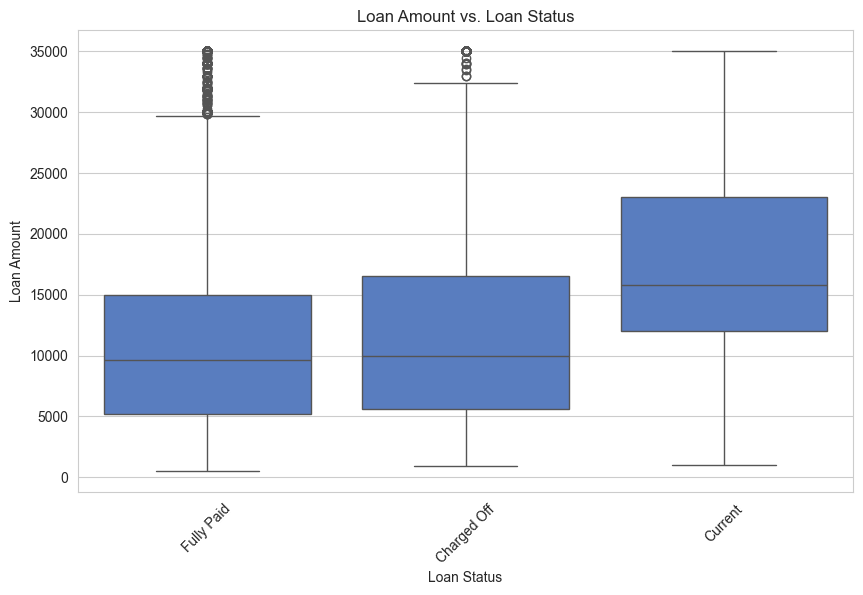

In [176]:
#Loan Amount vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned, palette=palette)
plt.title('Loan Amount vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

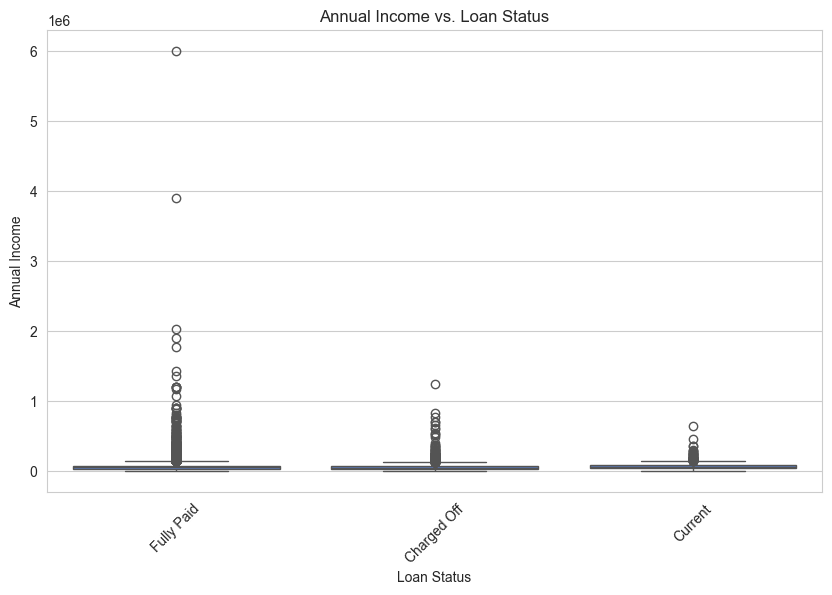

In [177]:
# Annual Income vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_cleaned, palette=palette)
plt.title('Annual Income vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

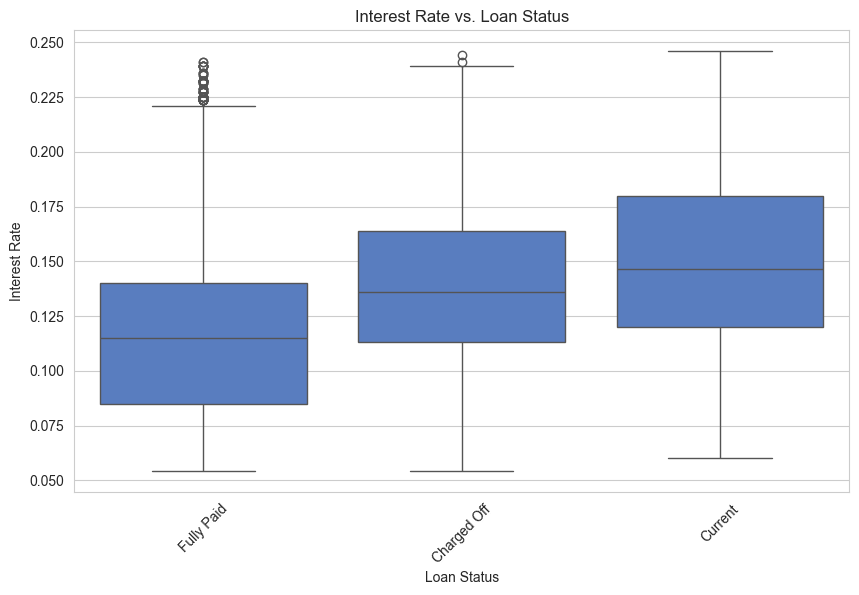

In [178]:
# Interest Rate vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned, palette=palette)
plt.title('Interest Rate vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

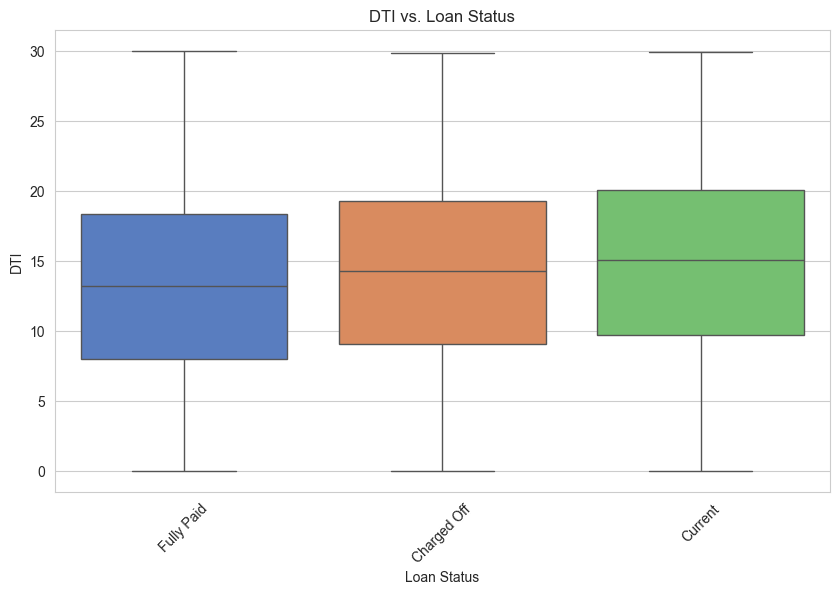

In [179]:
# Debt-to-Income Ratio (DTI) vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loan_data_cleaned, palette="muted")
plt.title('DTI vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI')
plt.xticks(rotation=45)
plt.show()

Categorical Features vs. Loan Status

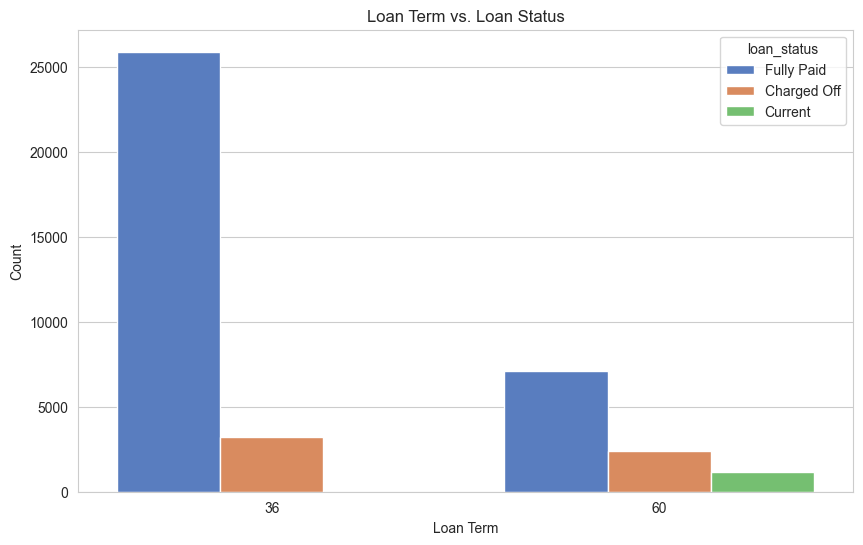

In [180]:
# Term vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=loan_data_cleaned, palette=palette)
plt.title('Loan Term vs. Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

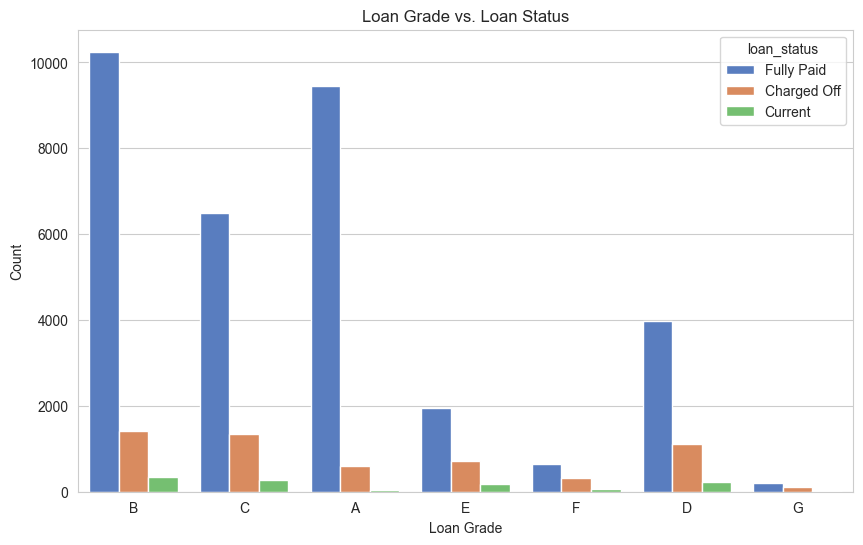

In [181]:
# Grade vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=loan_data_cleaned, palette=palette)
plt.title('Loan Grade vs. Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()


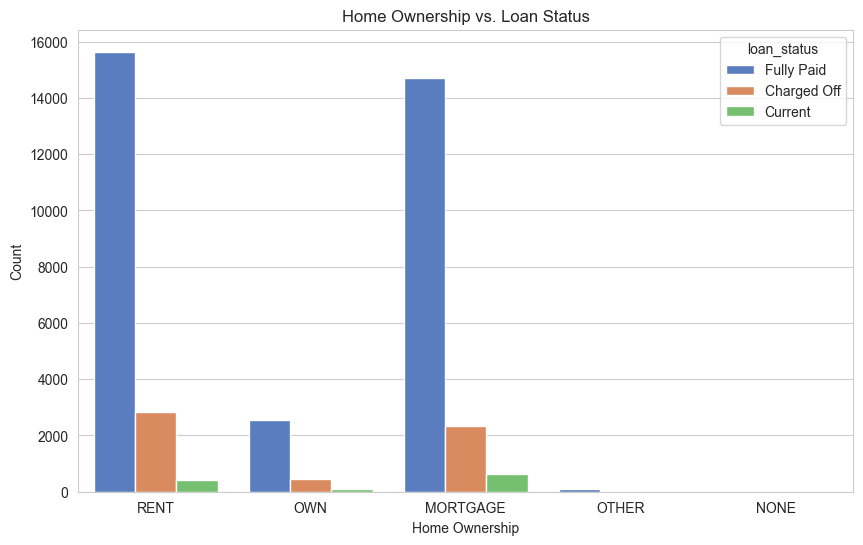

In [182]:
# Home Ownership vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data_cleaned, palette=palette)
plt.title('Home Ownership vs. Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

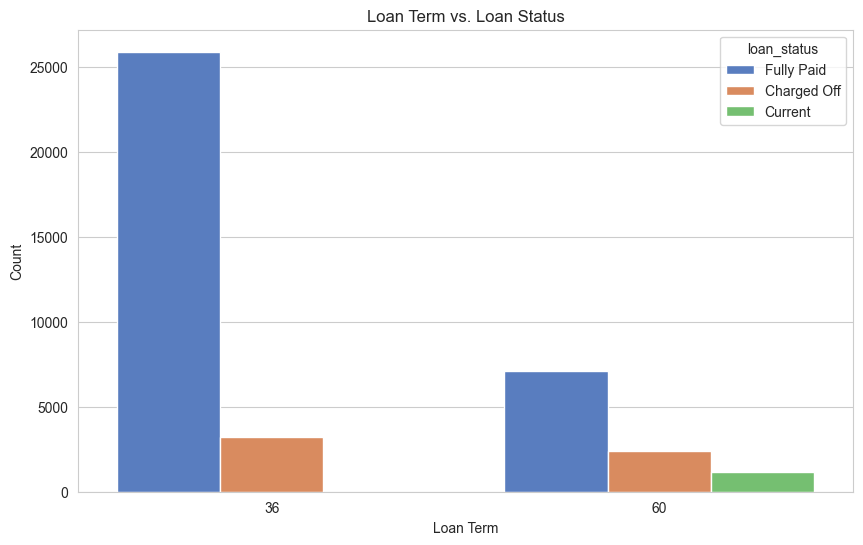

In [183]:
# Loan Term vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=loan_data_cleaned, palette=palette)
plt.title('Loan Term vs. Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

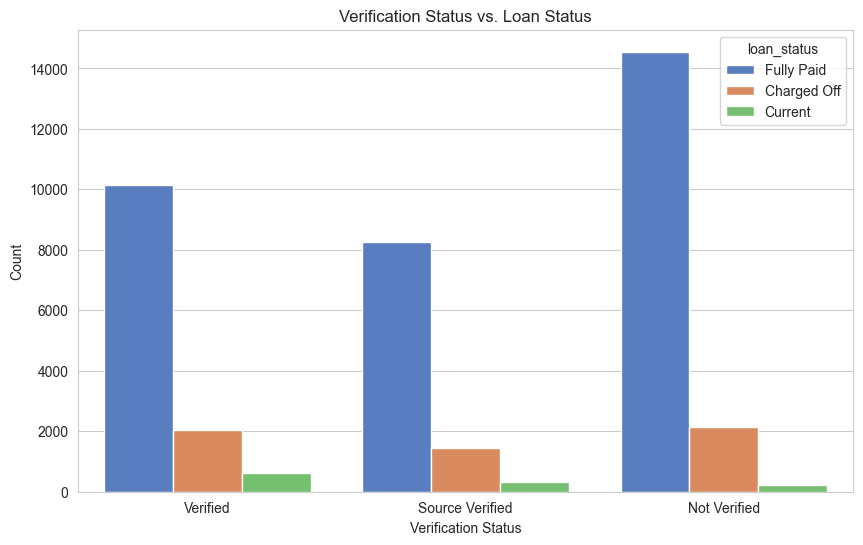

In [184]:
# Verification Status vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='loan_status', data=loan_data_cleaned, palette=palette)
plt.title('Verification Status vs. Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

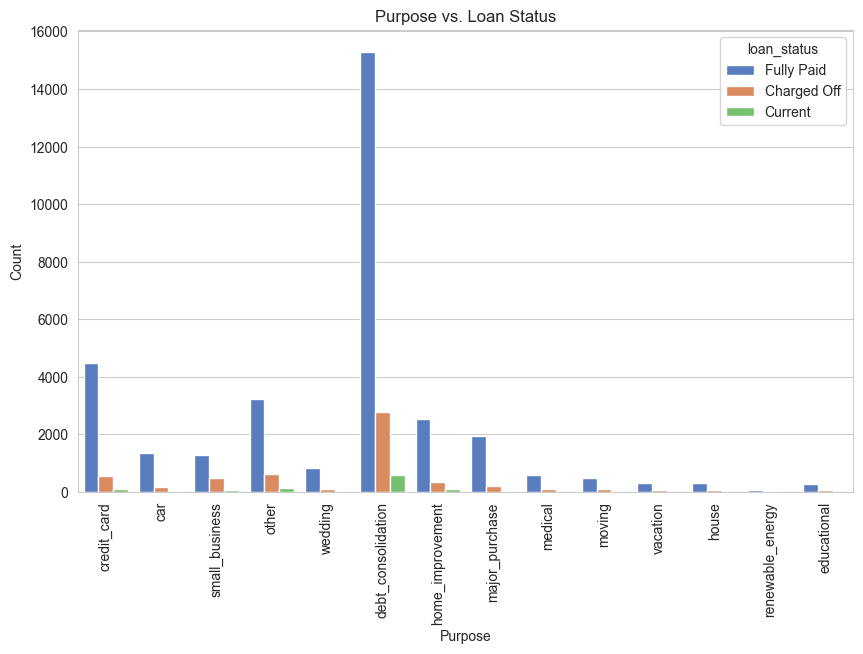

In [185]:
# Purpose vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', hue='loan_status', data=loan_data_cleaned, palette=palette)
plt.title('Purpose vs. Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<font size="4">***Bivariate Analysis Summary***</font>


**Numerical Features**:

- `Higher loan amounts, higher interest rates, and higher debt-to-income ratios are associated with a higher risk of default.`
- `Annual income does not show a strong relationship with loan default status.`

**Categorical Features**:

- `Longer loan terms and lower loan grades are associated with a higher risk of default.`
- `Home ownership status does not significantly impact loan default risk.`

<font size = "5">**Correlation Analysis**</font>

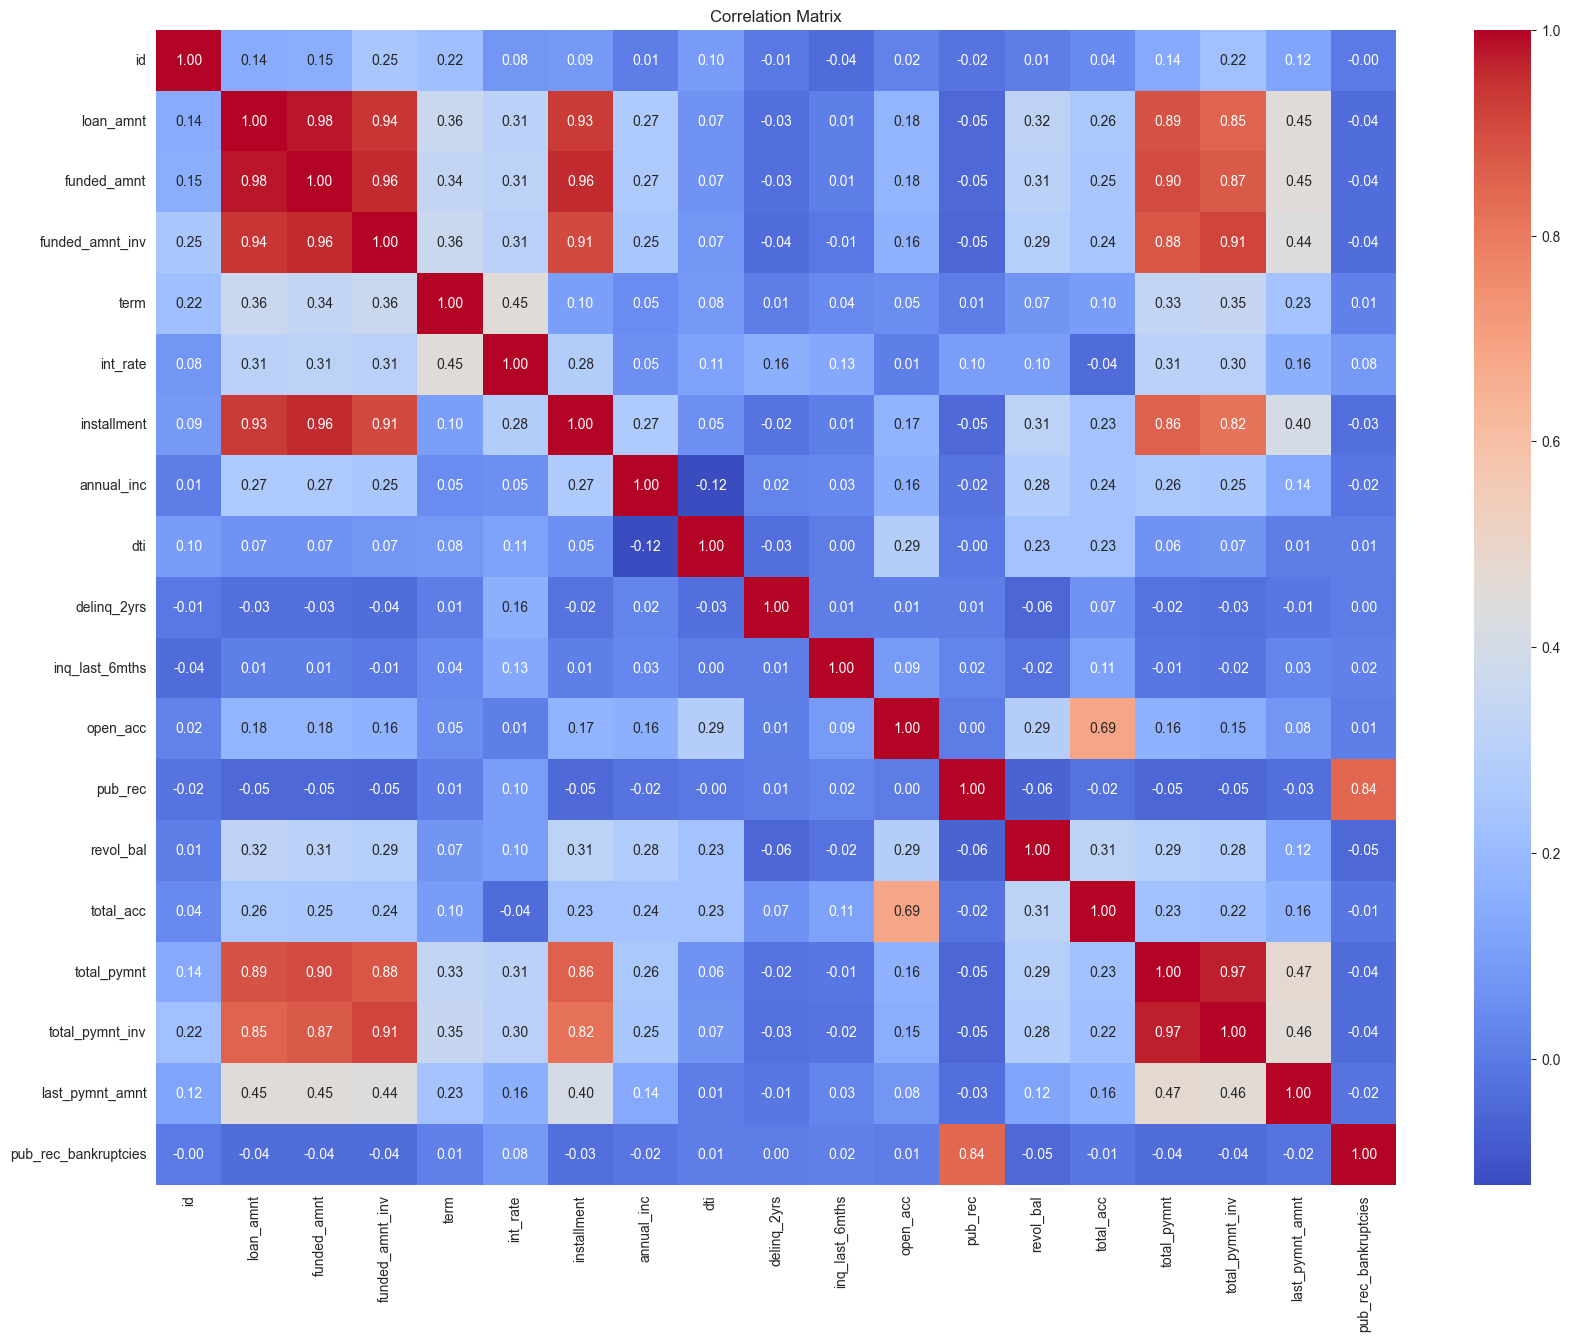

In [186]:
# Compute the correlation matrix for all numeric variables
correlation_matrix = loan_data_cleaned.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


### Insights from Correlation Analysis

#### High Correlation Pairs:
- **Loan Amount and Installment:** There is a very high correlation between `loan_amnt` and `installment`. This makes sense because the installment amount is directly calculated based on the loan amount and interest rate.
- **Total Payment Metrics:** `total_pymnt`, `total_rec_prncp`, and `total_pymnt_inv` are highly correlated with each other. These metrics reflect the payments made on the loan and are expected to be closely related.

#### Moderate Correlation:
- **Interest Rate:** `int_rate` shows a moderate correlation with `loan_amnt` and `installment`. This suggests that higher loan amounts might come with higher interest rates, influencing the installment amount.
- **Annual Income:** `annual_inc` has some correlation with `loan_amnt` and `installment`. Borrowers with higher incomes might be eligible for larger loans, resulting in higher installments.

#### Low Correlation:
- Many features exhibit low correlation with each other, indicating that they may independently influence loan status. This suggests that a model including these features could capture diverse aspects of the data without redundancy.




#### Summary of Correlation Analysis:
- **Loan Amount and Installment:** There is a very high correlation between `loan_amnt` and `installment`. This is expected as the installment amount is directly calculated based on the loan amount and interest rate.
- **Total Payment Metrics:** `total_pymnt`, `total_rec_prncp`, and `total_pymnt_inv` are highly correlated with each other. These metrics reflect the payments made on the loan and are expected to be closely related.
- **Interest Rate:** `int_rate` shows moderate correlation with `loan_amnt` and `installment`. This suggests that higher loan amounts might come with higher interest rates, influencing the installment amount.
- **Annual Income:** `annual_inc` has some correlation with `loan_amnt` and `installment`. Borrowers with higher incomes might be eligible for larger loans, resulting in higher installments.
- **Low Correlation:** Many features exhibit low correlation with each other, indicating that they may independently influence loan status.


In [187]:
# Feature Engineering

# Loan-to-Income Ratio
loan_data_cleaned['loan_to_income_ratio'] = loan_data_cleaned['loan_amnt'] / loan_data_cleaned['annual_inc']

# Convert employment length to numerical values
emp_length_map = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    'n/a': 0
}
loan_data_cleaned['emp_length_num'] = loan_data_cleaned['emp_length'].map(emp_length_map)

# Categorize interest rates into low, medium, and high
loan_data_cleaned['int_rate_level'] = pd.cut(
    loan_data_cleaned['int_rate'],
    bins=[0, 0.1, 0.15, 1],
    labels=['low', 'medium', 'high']
)

# Verify the new features
loan_data_cleaned[['loan_to_income_ratio', 'emp_length_num', 'int_rate_level']].head()


,loan_to_income_ratio,emp_length_num,int_rate_level
0,0.208333,10.0,medium
1,0.083333,0.5,high
2,0.195886,10.0,high
3,0.203252,10.0,medium
4,0.037500,1.0,medium


<font size = "5">**Multivariate Analysis**</font>

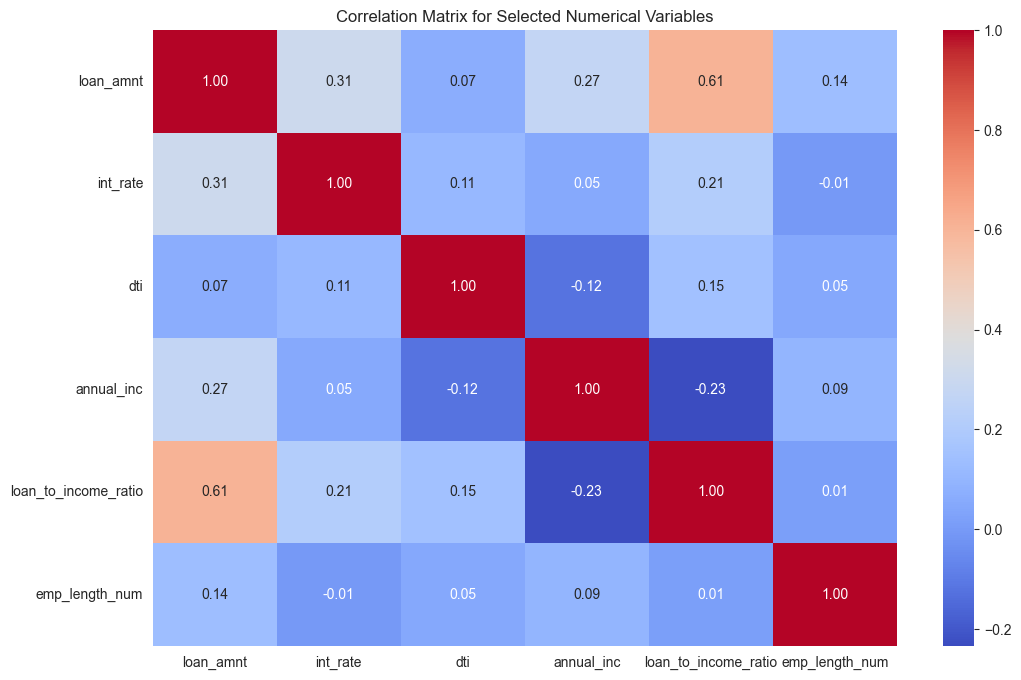

In [188]:
# Compute the correlation matrix for selected numerical variables
selected_columns = ['loan_amnt', 'int_rate', 'dti', 'annual_inc', 'loan_to_income_ratio', 'emp_length_num']
correlation_matrix_selected = loan_data_cleaned[selected_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Selected Numerical Variables')
plt.show()


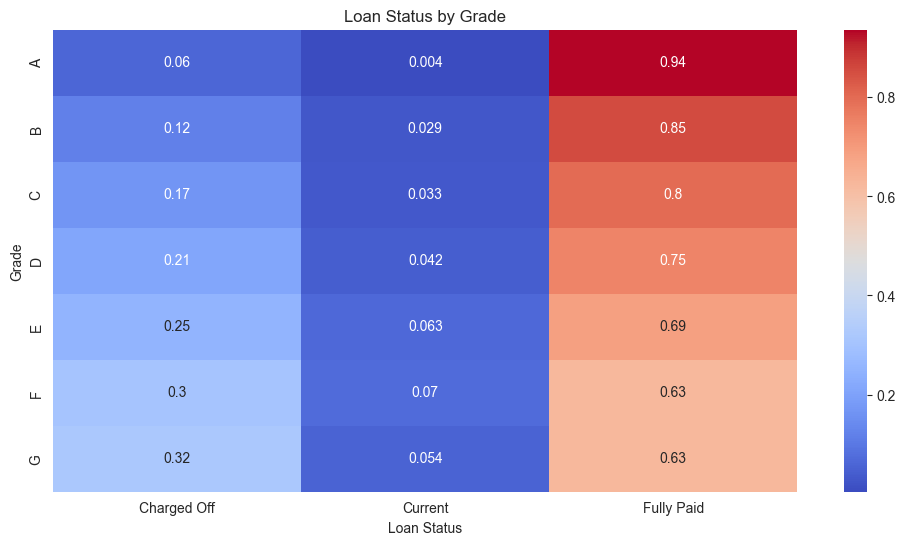

In [189]:
# Crosstab and Heatmap for Categorical Variables

# Crosstab for Grade and Loan Status
grade_crosstab = pd.crosstab(loan_data_cleaned['grade'], loan_data_cleaned['loan_status'])
grade_crosstab_normalized = grade_crosstab.div(grade_crosstab.sum(1), axis=0)

# Plot the heatmap for Grade and Loan Status
plt.figure(figsize=(12, 6))
sns.heatmap(grade_crosstab_normalized, annot=True, cmap='coolwarm', cbar=True)
plt.title('Loan Status by Grade')
plt.ylabel('Grade')
plt.xlabel('Loan Status')
plt.show()


#### Insights from Grade and Loan Status Heatmap <br>
The heatmap for loan status by grade shows the distribution of loan statuses across different loan grades:

- `Higher grades (A, B) have a larger proportion of fully paid loans.`
- `Lower grades (D, E, F, G) have a higher proportion of charged-off (defaulted) loans.`
- `This indicates that loan grade is a strong indicator of loan default risk.`

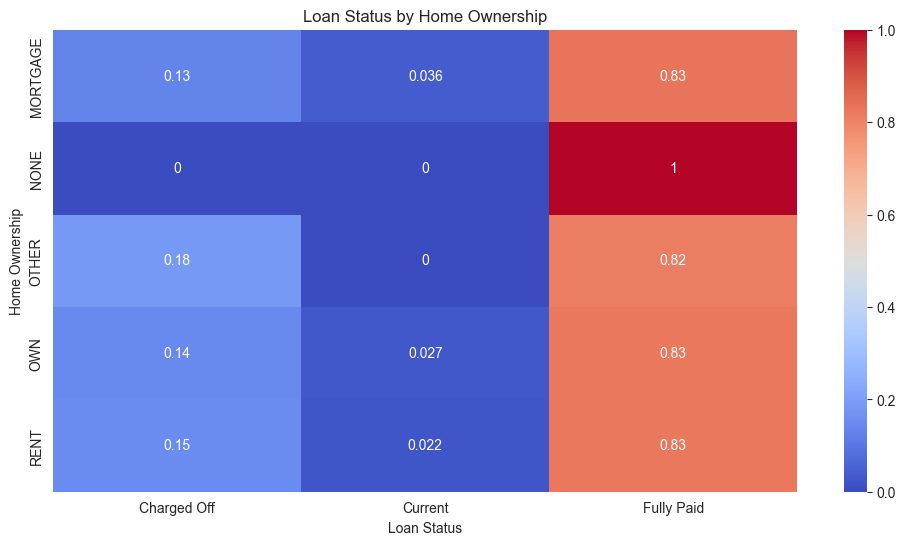

In [190]:
# Crosstab for Home Ownership and Loan Status
home_ownership_crosstab = pd.crosstab(loan_data_cleaned['home_ownership'], loan_data_cleaned['loan_status'])
home_ownership_crosstab_normalized = home_ownership_crosstab.div(home_ownership_crosstab.sum(1), axis=0)

# Plot the heatmap for Home Ownership and Loan Status
plt.figure(figsize=(12, 6))
sns.heatmap(home_ownership_crosstab_normalized, annot=True, cmap='coolwarm', cbar=True)
plt.title('Loan Status by Home Ownership')
plt.ylabel('Home Ownership')
plt.xlabel('Loan Status')
plt.show()


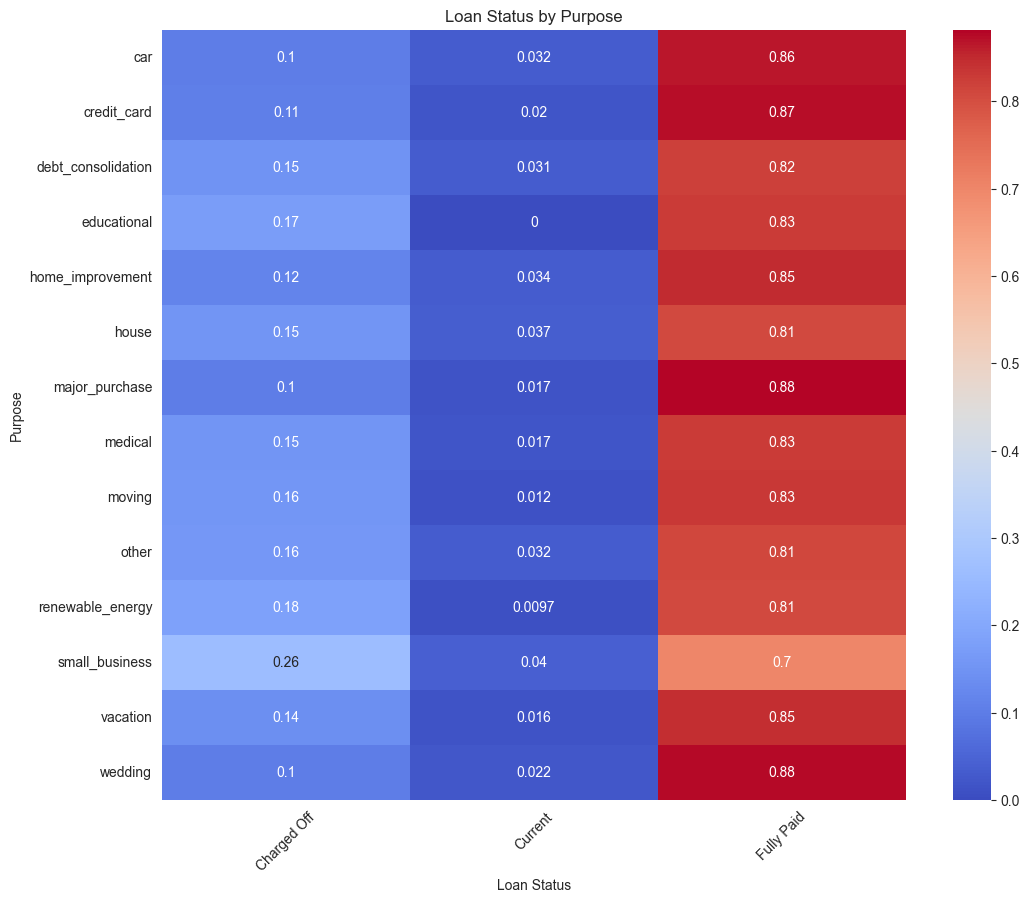

In [191]:
# Crosstab for Purpose and Loan Status
purpose_crosstab = pd.crosstab(loan_data_cleaned['purpose'], loan_data_cleaned['loan_status'])
purpose_crosstab_normalized = purpose_crosstab.div(purpose_crosstab.sum(1), axis=0)

# Plot the heatmap for Purpose and Loan Status
plt.figure(figsize=(12, 10))
sns.heatmap(purpose_crosstab_normalized, annot=True, cmap='coolwarm', cbar=True)
plt.title('Loan Status by Purpose')
plt.ylabel('Purpose')
plt.xlabel('Loan Status')
plt.xticks(rotation=45)
plt.show()

#### Insights from Home Ownership and Purpose Heatmaps<br>
**Home Ownership and Loan Status:**
- `The home_ownership heatmap reveals that applicants who own their homes tend to have a higher proportion of fully paid loans.`
- `Applicants who rent have a slightly higher proportion of charged-off loans compared to those who own or have a mortgage.`

**Purpose and Loan Status:**
- `The purpose heatmap shows that loans for purposes like credit card refinancing and debt consolidation have a higher proportion of fully paid loans.`
- `Loans for purposes such as small business, renewable energy, and educational expenses show a higher proportion of charged-off loans.`

### Final Conclusion

The Exploratory Data Analysis (EDA) of the loan dataset has provided several key insights into the factors influencing loan defaults. Here is the final conclusion based on the analysis:

#### Key Findings:
1. **High-Risk Indicators:**
   - **Loan Amount:** Higher loan amounts are associated with a higher risk of default.
   - **Interest Rate:** Higher interest rates are correlated with a greater likelihood of default.
   - **Debt-to-Income Ratio (DTI):** Borrowers with higher DTIs are more likely to default on their loans.
   - **Loan Grade:** Lower loan grades (D, E, F, G) have a higher proportion of defaults compared to higher grades (A, B).

2. **Moderate Impact Indicators:**
   - **Loan Term:** Longer loan terms (60 months) are associated with a higher risk of default.
   - **Purpose of Loan:** Loans taken for purposes such as small business, renewable energy, and educational expenses have a higher proportion of defaults.

3. **Low Impact Indicators:**
   - **Annual Income:** Shows a weak relationship with loan default status.
   - **Home Ownership Status:** Does not significantly impact the likelihood of default.

#### Business Implications:
- **Risk Management:** By identifying high-risk applicants based on loan amount, interest rate, DTI, and loan grade, the company can implement better risk management strategies.
- **Loan Approval Decisions:** The insights can help in refining loan approval criteria, such as setting stricter terms for high-risk applicants or adjusting interest rates to mitigate risk.
- **Targeted Interventions:** The company can offer financial counseling or alternative loan products to applicants identified as high-risk to help them manage their finances better and reduce the likelihood of default.

### Conclusion
The EDA has provided a comprehensive understanding of the driving factors behind loan defaults. By leveraging these insights, the company can make more informed decisions, reduce financial losses, and improve overall loan portfolio performance. The next phase will focus on building and refining predictive models to operationalize these findings.
